# Latency
Latency for LOS 

In [8]:
c = 300e6 # speed of light in m/s
d = 500e3 # distance in meters of LEO
t = d / c # time in seconds
t

0.0016666666666666668

# Capacity
## Mega Constellation
Starlink advertises a download speed of 40 - 220 Mbps.
Thus worst case data generation rate is 40 Mbps.

## Traditional Downlink
To estimate the capacity of a traditional downlink, we can use the Shannon-Hartley theorem:
$$C = B \log_2(1 + \frac{S}{N})$$
where:
- $C$ is the channel capacity in bits per second
- $B$ is the bandwidth in Hz
- $\frac{S}{N}$ is the signal to noise ratio

### Bandwidth
In the Ka band, a typical channel bandwidth is 240 MHz.

### Signal to Noise Ratio
For small satellites, and small ground stations, the signal to noise ratio is typically 5 - 15 dB.

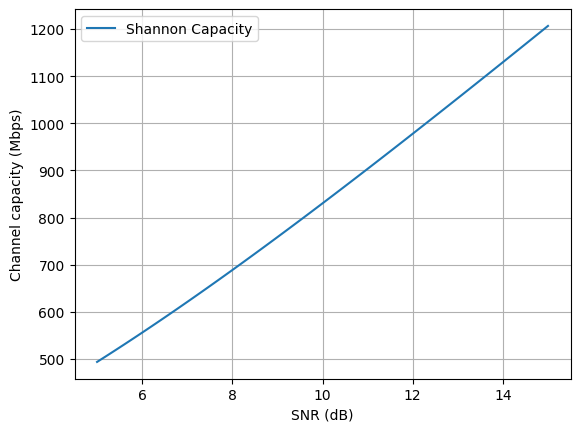

In [9]:
import numpy as np

B = 240e6 # bandwidth in Hz
snr_db = np.linspace(5, 15, 100) # signal to noise ratio in dB
snr = 10**(snr_db / 10) # signal to noise ratio

# Shannon's theorem
C = B * np.log2(1 + snr) # channel capacity in bits per second

import matplotlib.pyplot as plt
plt.plot(snr_db, C / 1e6, label='Shannon Capacity')
plt.xlabel('SNR (dB)')
plt.ylabel('Channel capacity (Mbps)')
plt.legend()
plt.grid()
plt.show()


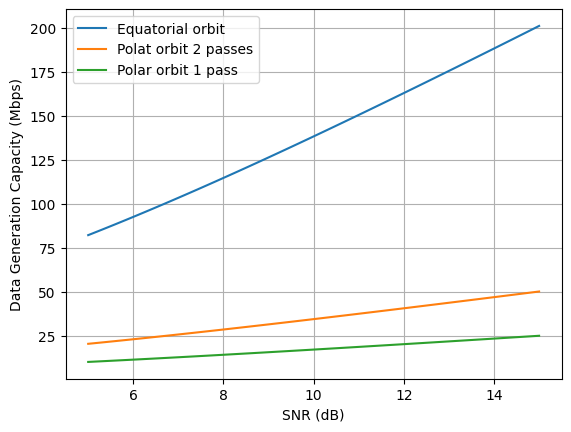

In [10]:
best = 15/90 # Equatorial orbit
worst = 15/(12*60) # Polar orbit 1 pass
realistic = 15/(6*60) # Polar orbit 2 passes

plt.clf()
plt.plot(snr_db, (C / 1e6) * best, label='Equatorial orbit')
plt.plot(snr_db, (C / 1e6) * realistic, label='Polat orbit 2 passes')
plt.plot(snr_db, (C / 1e6) * worst, label='Polar orbit 1 pass')
plt.xlabel('SNR (dB)')
plt.ylabel('Data Generation Capacity (Mbps)')
plt.legend()
plt.grid()
plt.show()

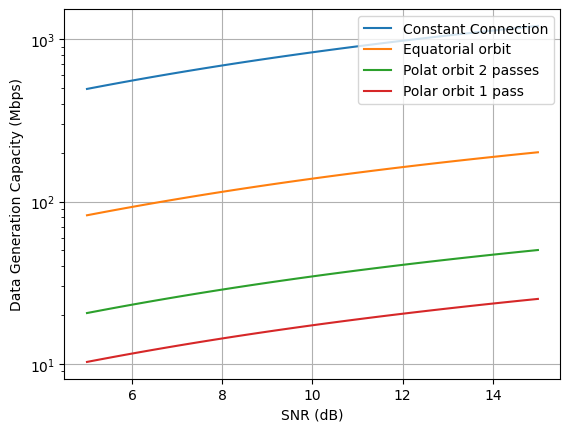

In [12]:
best = 15/90 # Equatorial orbit
worst = 15/(12*60) # Polar orbit 1 pass
realistic = 15/(6*60) # Polar orbit 2 passes

plt.clf()
plt.semilogy(snr_db, C / 1e6, label='Constant Connection')
plt.semilogy(snr_db, (C / 1e6) * best, label='Equatorial orbit')
plt.semilogy(snr_db, (C / 1e6) * realistic, label='Polat orbit 2 passes')
plt.semilogy(snr_db, (C / 1e6) * worst, label='Polar orbit 1 pass')
plt.xlabel('SNR (dB)')
plt.ylabel('Data Generation Capacity (Mbps)')
plt.legend()
plt.grid()
plt.show()